In [1]:
from pyraf import iraf
import os, sys
from astropy.io import fits
import numpy as np 
import pandas as pd


sys.path.append('/home/kevin/repos/ReipurthBallyProject')
from src.pyrafutils import subaru_reduction


os.chdir('/home/kevin/Documents/M8data/M8')
sred = subaru_reduction('M8', '/home/kevin/Documents/M8data')

In [2]:
!rm coord_maps/*.db coord_maps/*.out
detectors = ['chihiro', 'clarisse', 'fio', 'kiki', 'nausicaa', 'ponyo', 'san', 'satsuki', 'sheeta', 'sophie']
dfl = []
for d in detectors:
    res, res_df = sred.map_detector(d, degree=3)
    dfl.append([res['x_rms'], res['y_rms']])

rms_df = pd.DataFrame(dfl, index=detectors, columns=['x_rms', 'y_rms'])

In [3]:
!rm registered_image/*.fits
imgs = [f'SUPA015648{i:02d}' for i in range(50)]

for img in imgs:
    print(f'Tranforming: {img}')
    res=sred.transform_image(img)

rm: cannot remove 'registered_image/*.fits': No such file or directory


Tranforming: SUPA01564800


Tranforming: SUPA01564801
Tranforming: SUPA01564802
Tranforming: SUPA01564803
Tranforming: SUPA01564804
Tranforming: SUPA01564805
Tranforming: SUPA01564806
Tranforming: SUPA01564807
Tranforming: SUPA01564808
Tranforming: SUPA01564809
Tranforming: SUPA01564810
Tranforming: SUPA01564811
Tranforming: SUPA01564812
Tranforming: SUPA01564813
Tranforming: SUPA01564814
Tranforming: SUPA01564815
Tranforming: SUPA01564816
Tranforming: SUPA01564817
Tranforming: SUPA01564818
Tranforming: SUPA01564819
Tranforming: SUPA01564820
Tranforming: SUPA01564821
Tranforming: SUPA01564822
Tranforming: SUPA01564823
Tranforming: SUPA01564824
Tranforming: SUPA01564825
Tranforming: SUPA01564826
Tranforming: SUPA01564827
Tranforming: SUPA01564828
Tranforming: SUPA01564829
Tranforming: SUPA01564830
Tranforming: SUPA01564831
Tranforming: SUPA01564832
Tranforming: SUPA01564833
Tranforming: SUPA01564834
Tranforming: SUPA01564835
Tranforming: SUPA01564836
Tranforming: SUPA01564837
Tranforming: SUPA01564838
Tranforming:

In [4]:
[i for i in range(9,50,10)]

[9, 19, 29, 39, 49]

In [5]:
imgs = [f'./registered_image/SUPA015648{i:02d}.fits' for i in range(0,50, 10)]
imgs_out = [f'./SUPA015648{i:02d}.fits' for i in range(0,50, 10)]

with open('imglist.txt','w') as f:
    for i in imgs:
        f.write(f'{i}\n')
with open('imglistout.txt','w') as f:
    for i in imgs_out:
        f.write(f'{i}\n')

In [6]:

outfile = 'nausicaa.fits'

try:
    os.remove(outfile)
except:
    pass

iraf.imcombine('@imglist.txt', outfile, zero='mode',
                blank = -88888, 
                combine='median', offsets='wcs')


Dec  6 17:40: IMCOMBINE
  combine = median, scale = none, zero = mode, weight = none
  blank = -88888.
                Images     Mode    Zero
  ./registered_image/SUPA01564800.fits  4734.6      0.
  ./registered_image/SUPA01564810.fits  4014.8  719.85
  ./registered_image/SUPA01564820.fits  4272.7  461.89
  ./registered_image/SUPA01564830.fits  3099.2  1635.4
  ./registered_image/SUPA01564840.fits   3055.  1679.6

  Output image = nausicaa.fits, ncombine = 5


In [2]:
from ccdproc import ImageFileCollection

In [3]:
imc = ImageFileCollection('./registered_image/', glob_include='*.fits',
                          keywords=['NAXIS1','NAXIS2', 'CRPIX1', 'CRPIX2', 'CRVAL1', 'CRVAL2', 'DETECTOR'])


In [9]:
imc.summary

file,NAXIS1,NAXIS2,CRPIX1,CRPIX2,CRVAL1,CRVAL2,DETECTOR
str17,int64,int64,float64,float64,float64,float64,str8
SUPA01564800.fits,2048,4177,-3138.0,-85.0,270.90375,-24.38665278,nausicaa
SUPA01564801.fits,2048,4177,-1040.0,-86.0,270.90375,-24.38665278,kiki
SUPA01564802.fits,2048,4177,1060.0,-88.0,270.90375,-24.38665278,fio
SUPA01564803.fits,2048,4177,-3161.0,4119.0,270.90375,-24.38665278,sophie
SUPA01564804.fits,2048,4177,-1076.0,4141.0,270.90375,-24.38665278,sheeta
SUPA01564805.fits,2048,4177,1047.0,4166.0,270.90375,-24.38665278,satsuki
SUPA01564806.fits,2048,4177,5268.0,-23.0,270.90375,-24.38665278,chihiro
SUPA01564807.fits,2048,4177,3176.0,-62.0,270.90375,-24.38665278,clarisse
SUPA01564808.fits,2048,4177,5244.0,4165.0,270.90375,-24.38665278,ponyo


In [4]:
from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs, reproject_and_coadd



In [11]:
imgs_by_detector = imc.summary.group_by('DETECTOR')
for key, group in zip(imgs_by_detector.groups.keys, imgs_by_detector.groups):
    print(f'****** {key["DETECTOR"]} *******')
    print(group)
    print('')

****** chihiro *******
       file       NAXIS1 NAXIS2 CRPIX1 CRPIX2    CRVAL1       CRVAL2    DETECTOR
----------------- ------ ------ ------ ------ ------------ ------------ --------
SUPA01564806.fits   2048   4177 5268.0  -23.0    270.90375 -24.38665278  chihiro
SUPA01564816.fits   2048   4177 5268.0  -23.0 270.91595833 -24.40886944  chihiro
SUPA01564826.fits   2048   4177 5268.0  -23.0 270.92815833 -24.37553611  chihiro
SUPA01564836.fits   2048   4177 5268.0  -23.0 270.89155833 -24.36442222  chihiro
SUPA01564846.fits   2048   4177 5268.0  -23.0 270.87937083 -24.39777222  chihiro

****** clarisse *******
       file       NAXIS1 NAXIS2 CRPIX1 CRPIX2    CRVAL1       CRVAL2    DETECTOR
----------------- ------ ------ ------ ------ ------------ ------------ --------
SUPA01564807.fits   2048   4177 3176.0  -62.0    270.90375 -24.38665278 clarisse
SUPA01564817.fits   2048   4177 3176.0  -62.0 270.91595833 -24.40886944 clarisse
SUPA01564827.fits   2048   4177 3176.0  -62.0 270.92815833 -2

In [12]:
detectors = imc.values('DETECTOR', unique=True)
for detector in detectors:
    print(f'Processing detector: {detector}')
    det_img_list = imc.files_filtered(DETECTOR= detector, include_path=True)
    wcs_out, shape_out = find_optimal_celestial_wcs(det_img_list)
    array, footprint = reproject_and_coadd(det_img_list,
                                       wcs_out, shape_out=shape_out,
                                       combine_function='mean',
                                       reproject_function=reproject_interp)
    array = array.astype(np.float32)
    phdu = fits.PrimaryHDU(data = array, header=wcs_out.to_header())
    phdu.writeto(detector+'.fits', overwrite=True)

Processing detector: sheeta
Processing detector: nausicaa
Processing detector: kiki
Processing detector: sophie
Processing detector: chihiro
Processing detector: clarisse
Processing detector: satsuki
Processing detector: fio
Processing detector: ponyo
Processing detector: san


In [5]:
detectors = imc.values('DETECTOR', unique=True)
outfile='M8mosaic.fits'
det_list = [d+'.fits' for d in detectors]
wcs_out, shape_out = find_optimal_celestial_wcs(det_list)
array, footprint = reproject_and_coadd(det_list,
                                       wcs_out, shape_out=shape_out,
                                       combine_function='mean',
                                       reproject_function=reproject_interp)
phdu = fits.PrimaryHDU(data = array, header=wcs_out.to_header())
phdu.writeto(outfile, overwrite=True)

: 

In [ ]:
wcs_out.to_header()

In [ ]:
shape_out

In [ ]:
array, footprint = reproject_and_coadd(imc.files_filtered(include_path=True),
                                       wcs_out, shape_out=shape_out,
                                       combine_function='mean',
                                       reproject_function=reproject_interp)

Text(0.5, 1.0, 'Footprint')

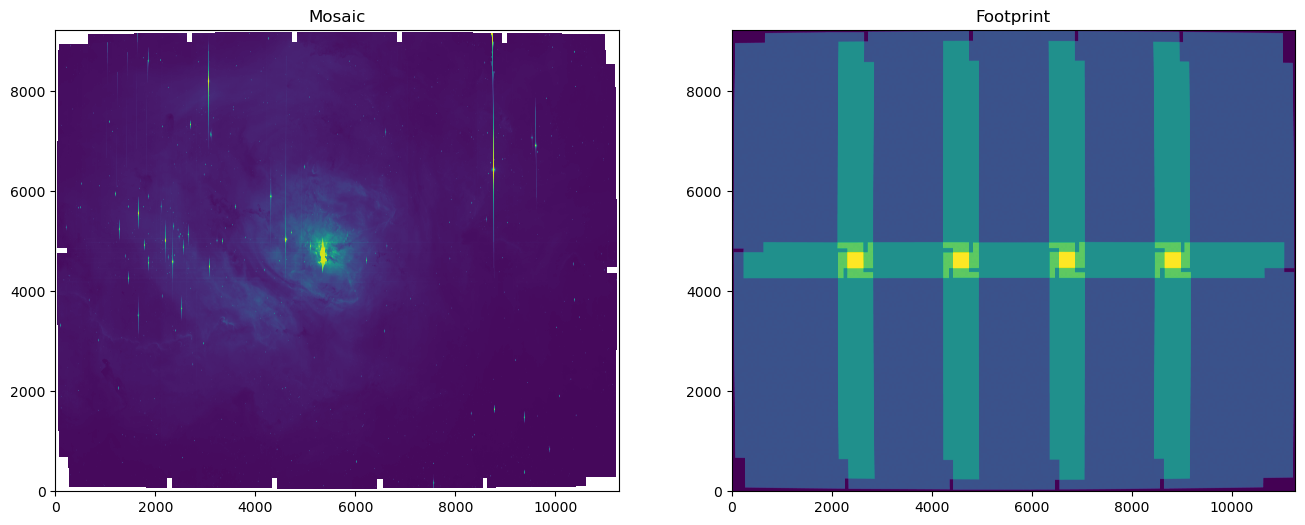

In [20]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
ax1 = plt.subplot(1, 2, 1)
im1 = ax1.imshow(array, origin='lower') #, vmin=600, vmax=800)
ax1.set_title('Mosaic')
ax2 = plt.subplot(1, 2, 2)
im2 = ax2.imshow(footprint, origin='lower')
ax2.set_title('Footprint')

In [ ]:
phdu = fits.PrimaryHDU(data = array, header=wcs_out.to_header())
phdu.writeto(outfile, overwrite=True)